In [1]:
import sionna.rt
import tensorflow

# Other imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

no_preview = False # Toggle to False to use the preview widget

# Import relevant components from Sionna RT
from sionna.rt import load_scene, PlanarArray, Transmitter, Receiver, Camera,\
                      PathSolver, RadioMapSolver, subcarrier_frequencies

In [2]:
scene = load_scene("austin/UT_Twin_1.xml") # Try also sionna.rt.scene.etoile

In [3]:
# adjust this to see most of the scene, as the camera angle is saved through the rest of the file
if not no_preview:
    scene.preview()

# Sionna RT experiments with UT_Twin_1

1. Scene loading and visualization
2. Scene object inspection
3. Transmitter and receiver configuration
4. Ray tracing and propagation path computation
5. Coverage map generation

In [11]:
scene.objects

{'elm__7': <sionna.rt.scene_object.SceneObject at 0x16a08aff0>,
 'elm__6': <sionna.rt.scene_object.SceneObject at 0x17630fdd0>,
 'elm__3': <sionna.rt.scene_object.SceneObject at 0x176354620>}

## Configuring Transmitters and Receivers

In [12]:
scene.tx_array = PlanarArray(num_rows=1,
                              num_cols=1,
                              vertical_spacing=0.5,
                              horizontal_spacing=0.5,
                              pattern="iso",
                              polarization="V")

scene.rx_array = PlanarArray(num_rows=1,
                              num_cols=1,
                              vertical_spacing=0.5,
                              horizontal_spacing=0.5,
                              pattern="iso",
                              polarization="V")

In [13]:
try:
    # placing transmitters and recievers
    tx = Transmitter(name="tx",
                    position=[20.083, 47.127, 94.000])

    scene.add(tx)

    rx = Receiver(name="rx",
                position=[-93.897, 181.814, 0.000],
                orientation=[0, 0, 0])

    scene.add(rx)
except:
    print("tx and rx might already exist, reload the scene object")

tx and rx might already exist, reload the scene object


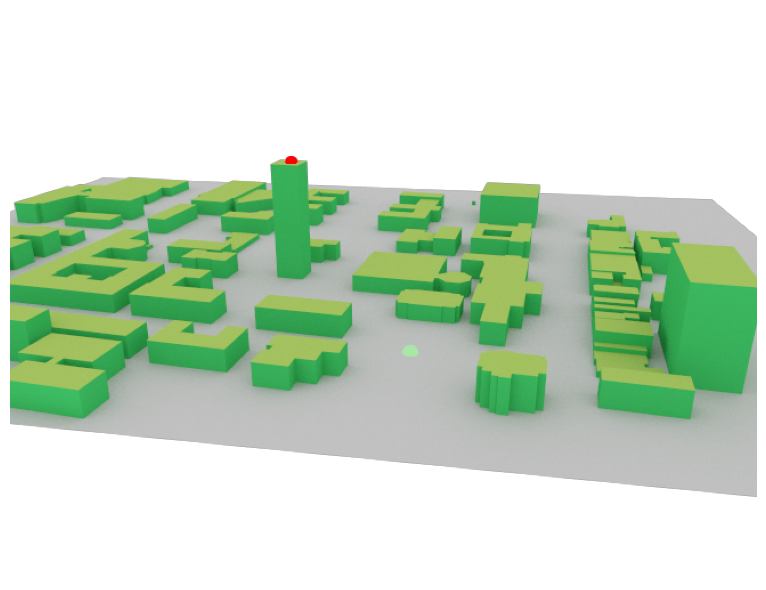

In [14]:
# Only availabe if a preview is open
if not no_preview:
    scene.render(camera="preview", num_samples=512)

## Computing Propagation Paths

In [15]:
scene.frequency = 3.5e9
scene.synthetic_array = True

path_solver = PathSolver()
paths = path_solver(scene, max_depth=5)

In [16]:
a, tau = paths.cir()

print(f"Channel impulse response shape: {a}")
print(f"Delays shape: {tau.shape}")
print(f"\nTransmitters in scene: {list(scene.transmitters.keys())}")
print(f"Receivers in scene: {list(scene.receivers.keys())}")

Channel impulse response shape: [[[[[[[-5.56234e-06],
     [-1.53687e-06],
     [-3.7494e-06],
     [-2.1663e-07],
     [-3.24141e-06],
     [-7.77084e-07],
     [-7.62762e-07],
     [1.04016e-06],
     [4.35081e-07],
     [-1.56917e-06],
     [-9.20974e-08],
     [9.58454e-07],
     [-1.36141e-06],
     [-2.86877e-07],
     [-5.7689e-08],
     [1.95758e-07]]]]]], [[[[[[1.88723e-05],
     [-8.08669e-06],
     [-6.869e-06],
     [-6.43807e-07],
     [-1.3349e-06],
     [-1.25815e-06],
     [2.5575e-06],
     [3.78572e-08],
     [-2.60329e-07],
     [4.91223e-07],
     [9.62956e-09],
     [6.27424e-07],
     [-3.33192e-07],
     [5.7634e-07],
     [3.93822e-07],
     [-1.39236e-07]]]]]]]
Delays shape: (1, 1, 16)

Transmitters in scene: ['tx']
Receivers in scene: ['rx']


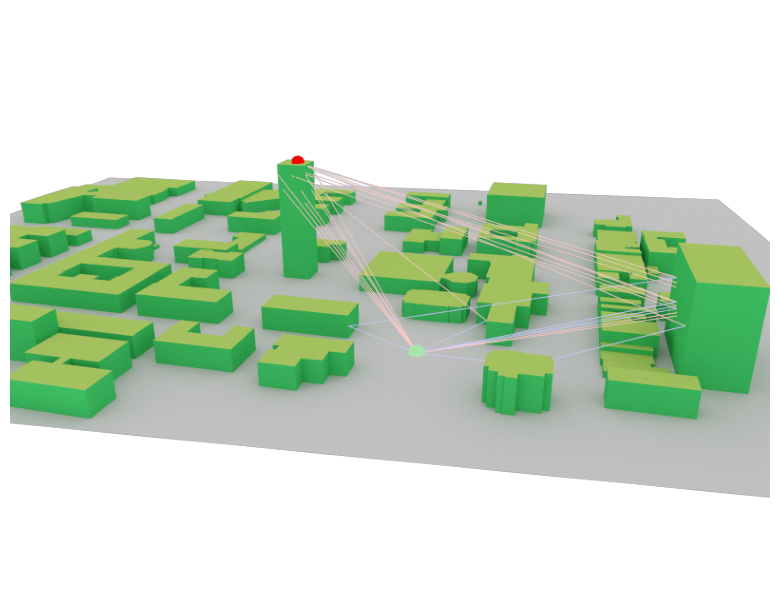

In [17]:
# this shows transmission paths from green to red dot (Tx to Rx)
if not no_preview:
    scene.render(camera="preview", paths=paths, resolution=[800, 600], num_samples=512)

## Coverage Maps

In [18]:
tx_pos = [-243.733, -114.462, 13.442]
rx_pos = [-153.347, 77.729, 16.536]

cm_cell_center = [(tx_pos[0] + rx_pos[0])/2, (tx_pos[1] + rx_pos[1])/2, 1.5]
cm_orientation = [0.0, 0.0, 0.0]
cm_size = [200.0, 250.0]
cm_cell_size = [2.0, 2.0]

print(f"Coverage map centered at: {cm_cell_center}")
print(f"Coverage map size: {cm_size[0]}m x {cm_size[1]}m")
print(f"Cell resolution: {cm_cell_size[0]}m x {cm_cell_size[1]}m")

radio_map_solver = RadioMapSolver()
cm = radio_map_solver(scene)

Coverage map centered at: [-198.54000000000002, -18.366500000000002, 1.5]
Coverage map size: 200.0m x 250.0m
Cell resolution: 2.0m x 2.0m


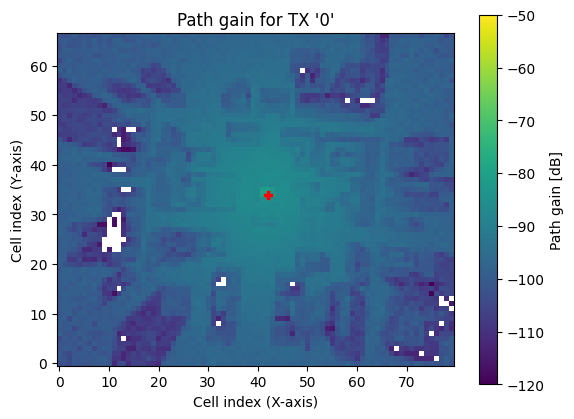

In [19]:
cm.show(tx=0, vmin=-120, vmax=-50);